## Average Traffic Counts by Neighborhood
#### Jax Hraber
Dataset: [City of Pittsburgh Traffic Count](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh)

I chose to analyze the average amount of vehicle traffic in each of the Pittsburgh neighborhoods per day. This dataset was taken using StatTrak devices that record information about passing cars, which were placed on selected streets in the neighborhoods. I chose this dataset because less traffic is generally a good indicator or many healthy factors, including more pedestrian activity, better air quality, and safer spaces for children and families.

In [81]:
# creating dataframe
import pandas as pd

data = pd.read_csv("Traffic.csv")
data.head(10)


,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15
5,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,...,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
6,1047444948,17,1.366891e+09,2018-10-18,NaN,NaN,NaN,NaN,NaN,25.0,...,-79.942273,40.446282,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26
7,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,...,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
8,1073440033,156,1.736165e+09,2017-07-28,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.960385,40.438983,Central Oakland,3.0,4.0,42003040500,3.0,4.0,4.0,2-14
9,1092885547,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-79.920958,40.467294,East Liberty,9.0,11.0,42003111300,2.0,11.0,5.0,3-8


**I will be only focusing on the "average daily car traffic" and "neighborhood" columns. This dataset contains a lot of seperate entries for each neighborhood, as well as a ton of rows containing no data about traffic, so I decided to use a dictionary to store data as cumulative sums of average traffic per neighborhood for simplification:**

In [82]:

totalcounts = {}

# adding data to dictionary
for index, row in data.iterrows():
    traffic = row['average_daily_car_traffic']
    neighborhood = row['neighborhood']
    if traffic > 0:
        if neighborhood in totalcounts:
            totalcounts[neighborhood] += traffic
        else:
            totalcounts.update({neighborhood: traffic})
print(totalcounts)

{'Polish Hill': 15894.0, 'Squirrel Hill South': 79302.0, 'Central Northside': 5945.0, 'Bluff': 5365.0, 'Crafton Heights': 11500.0, 'Shadyside': 66132.0, 'Highland Park': 23471.0, 'North Shore': 10350.0, 'East Liberty': 51247.0, 'Mount Washington': 47336.0, 'Brookline': 39144.0, 'Squirrel Hill North': 35452.0, 'Bloomfield': 43101.0, 'Larimer': 37713.0, 'Friendship': 4887.0, 'Point Breeze': 31242.0, 'Regent Square': 16729.0, 'Central Lawrenceville': 13499.0, 'Knoxville': 7646.0, 'Central Oakland': 11306.0, 'Strip District': 29075.0, 'Greenfield': 7158.0, 'Windgap': 3062.0, 'Beechview': 4255.0, 'Upper Hill': 2860.0, 'Stanton Heights': 16272.0, 'Manchester': 21293.0, 'South Side Slopes': 26447.0, 'Perry North': 19114.0, 'North Oakland': 23821.0, 'East Hills': 16253.0, 'Duquesne Heights': 5831.0, 'Sheraden': 8532.0, 'Morningside': 14345.0, 'Central Business District': 2305.0, 'St. Clair': 2436.0, 'Perry South': 12075.0, 'Elliott': 4028.0, 'Carrick': 13787.0, 'Westwood': 15400.0, 'Allegheny 


**This data is much more readable compared to the dataframe, however I want to organize it into ascending order so I can easily identify the neighborhoods with the least and most traffic. I will do this using the "sorted" function to create a list:**

In [83]:
sortedcounts = sorted(totalcounts.items(), key = lambda x:x[1])
print(sortedcounts)

[('South Side Flats', 115.0), ('Lincoln Place', 126.0), ('Lincoln-Lemington-Belmar', 195.0), ('Fineview', 419.0), ('Allegheny West', 477.0), ('New Homestead', 666.0), ('Overbrook', 777.0), ('Summer Hill', 937.0), ('Spring Garden', 1226.0), ('Beltzhoover', 1577.0), ('East Allegheny', 1924.0), ('Central Business District', 2305.0), ('Allegheny Center', 2386.0), ('St. Clair', 2436.0), ('Chartiers City', 2571.0), ('Hazelwood', 2579.0), ('West Oakland', 2585.0), ('Spring Hill-City View', 2586.0), ('Upper Hill', 2860.0), ('Windgap', 3062.0), ('Lower Lawrenceville', 3472.0), ('Elliott', 4028.0), (nan, 4184.0), ('Beechview', 4255.0), ('Arlington', 4571.0), ('Friendship', 4887.0), ('Bluff', 5365.0), ('Duquesne Heights', 5831.0), ('Central Northside', 5945.0), ('Homewood North', 7027.0), ('Greenfield', 7158.0), ('Brighton Heights', 7547.0), ('Knoxville', 7646.0), ('Sheraden', 8532.0), ('Point Breeze North', 9928.0), ('North Shore', 10350.0), ('Central Oakland', 11306.0), ('Crafton Heights', 1150

**Now that the data is sorted and readable, we can make a plot to easily visualize the differences between the neighborhoods. To do this, we can turn the dictionary back into a dataframe:**

In [63]:
# making dataframe
countsdf = pd.DataFrame(sortedcounts, columns = ['Neighborhood','Average Daily Traffic Count'])
countsdf

,Neighborhood,Average Daily Traffic Count
0,South Side Flats,115.0
1,Lincoln Place,126.0
2,Lincoln-Lemington-Belmar,195.0
3,Fineview,419.0
4,Allegheny West,477.0
...,...,...
60,Bloomfield,43101.0
61,Mount Washington,47336.0
62,East Liberty,51247.0
63,Shadyside,66132.0


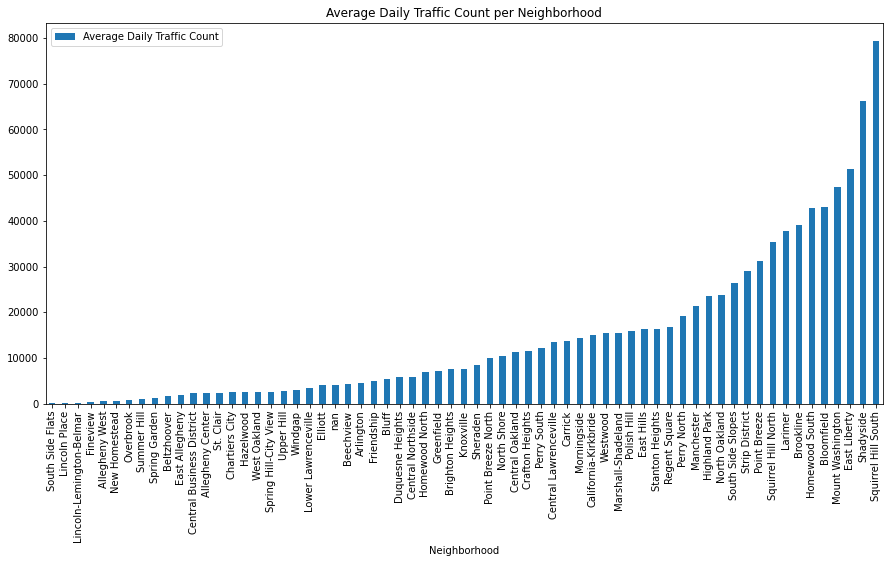

In [75]:
#Plotting
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)
countsdf.plot.bar(x = "Neighborhood" , y = "Average Daily Traffic Count" , rot = 90, title = "Average Daily Traffic Count per Neighborhood")
plt.show()

**This is a lot of data at once, so we can split it up and create two more graphs showing the 5 neighborhoods with the most traffic and the 5 neighborhoods with the least:**

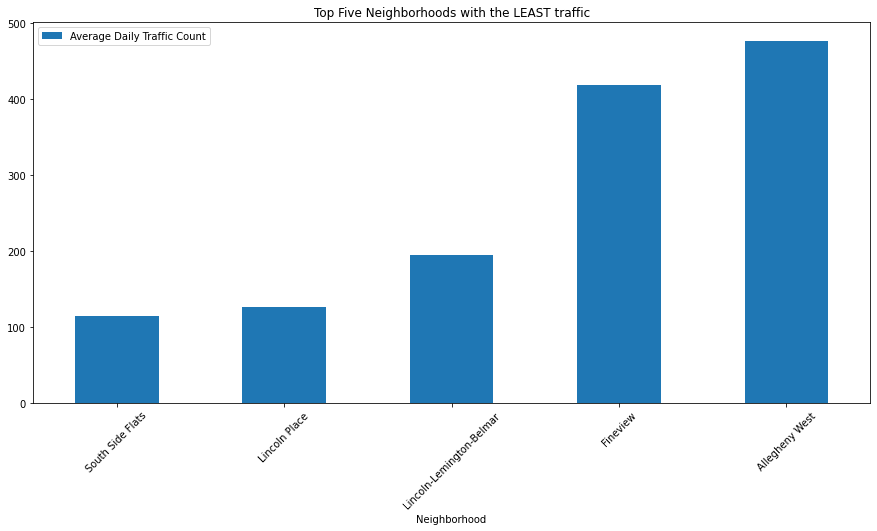

In [79]:

plt.rcParams["figure.figsize"] = (15,7)
countsdf.head(5).plot.bar(x = "Neighborhood" , y = "Average Daily Traffic Count" , rot = 45, title = "Top Five Neighborhoods with the LEAST traffic")
plt.show()

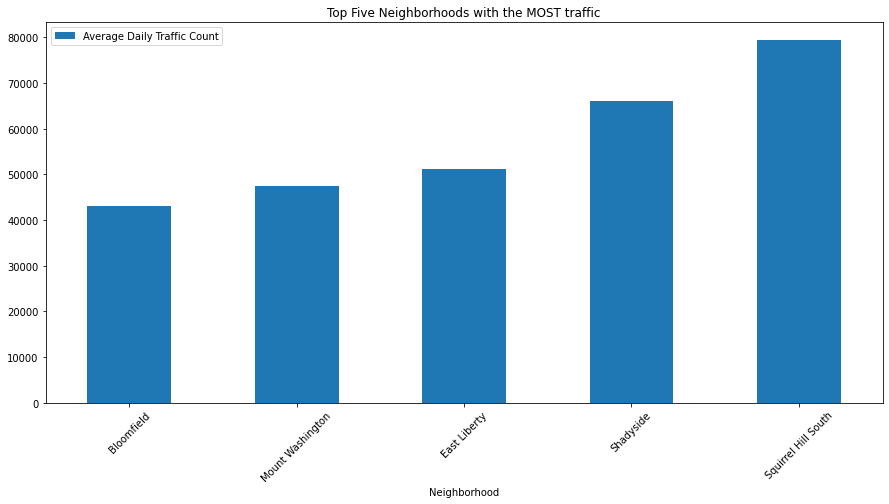

In [80]:
plt.rcParams["figure.figsize"] = (15,7)
countsdf.tail(5).plot.bar(x = "Neighborhood" , y = "Average Daily Traffic Count" , rot = 45, title = "Top Five Neighborhoods with the MOST traffic")
plt.show()

### Conclusion:
By looking at the data, we can determine that the five neighborhoods with the least amount of traffic are South Side Flats, Lincoln Place, Lincoln-Lemington-Belmar, Fairview, and Allegheny West. These neighborhoods would be considered the "best" for this metric, as the least amount of traffic indicates that the roads will be safer for children, and also these neighborhoods will have included benefits like better air quality and more open pedestrain space. Conversely, the five neighborhoods with the most traffic are Bloomfield, Mount Washington, East Liberty, Shadyside, and Squirrel Hill South. This areas are likely to suffer a lot of noise and air pollution, as well as more dangerous streets.